In [1]:
%matplotlib inline
from DQN import *
import gym
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)
scores=[]
EPISODES = 2000

for e in range(EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    done=False
    time=0
    while not(done):
        time+=1
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.memorize(state, action, reward, next_state, done)
        state = next_state
        if done:
            if e % 100 == 0 and e>1:
                print("episode: {}/{}, Score Mean: {} / Median: {} ".format(e, EPISODES, int(np.mean(scores)), int(np.median(scores))))
                print("Beta {:.5f} / Eps: {:.5f}".format(agent.memory.beta, agent.epsilon))
            scores.append(time)
    if agent.memory.tree.n_entries > 1000:
        agent.replay()

episode: 100/2000, Score Mean: 21 / Median: 19 
Beta 0.32700 / Eps: 0.76286
episode: 200/2000, Score Mean: 35 / Median: 28 
Beta 0.37700 / Eps: 0.46212
episode: 300/2000, Score Mean: 72 / Median: 43 
Beta 0.42700 / Eps: 0.27994
episode: 400/2000, Score Mean: 128 / Median: 76 
Beta 0.47700 / Eps: 0.16958
episode: 500/2000, Score Mean: 172 / Median: 145 
Beta 0.52700 / Eps: 0.10273
episode: 600/2000, Score Mean: 203 / Median: 199 
Beta 0.57700 / Eps: 0.06223
episode: 700/2000, Score Mean: 232 / Median: 235 
Beta 0.62700 / Eps: 0.03770
episode: 800/2000, Score Mean: 254 / Median: 262 
Beta 0.67700 / Eps: 0.02284
episode: 900/2000, Score Mean: 273 / Median: 285 
Beta 0.72700 / Eps: 0.01383
episode: 1000/2000, Score Mean: 287 / Median: 304 
Beta 0.77700 / Eps: 0.00999
episode: 1100/2000, Score Mean: 298 / Median: 317 
Beta 0.82700 / Eps: 0.00999
episode: 1200/2000, Score Mean: 310 / Median: 334 
Beta 0.87700 / Eps: 0.00999
episode: 1300/2000, Score Mean: 321 / Median: 355 
Beta 0.92700 / Ep

Text(0.5, 1.0, 'Avg. Training Score')

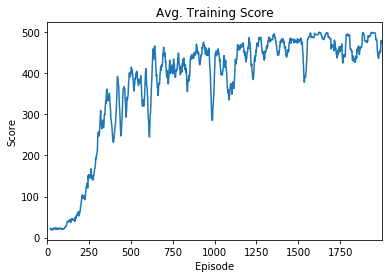

In [3]:
pd.Series(scores).rolling(20).mean().plot()
plt.xlabel("Episode")
plt.ylabel("Score")
plt.title("Avg. Training Score")